In [33]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import scale, minmax_scale, robust_scale
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from statsmodels.formula.api import ols
from statsmodels.api import qqplot, add_constant
import statsmodels.formula.api as smf
from statsmodels.tools.eval_measures import rmse
%matplotlib inline
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [34]:
# 데이터 불러오기 및 기술통계량 확인
df_raw = pd.read_csv("체질검사.csv", engine="python", encoding="cp949") 
df_raw.describe()

,FAT,AGE,WEIGHT,HEIGHT,NECK,CHEST,ABDOMEN,HIP,THIGH,KNEE,ANKLE,BICEPS,FOREARM,WRIST
count,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000
mean,19.150794,44.884921,178.924405,70.148810,37.992063,100.824206,92.555952,99.904762,59.405952,38.590476,23.102381,32.273413,28.663889,18.229762
std,8.368740,12.602040,29.389160,3.662856,2.430913,8.430476,10.783077,7.164058,5.249952,2.411805,1.694893,3.021274,2.020691,0.933585
min,0.000000,22.000000,118.500000,29.500000,31.100000,79.300000,69.400000,85.000000,47.200000,33.000000,19.100000,24.800000,21.000000,15.800000
25%,12.475000,35.750000,159.000000,68.250000,36.400000,94.350000,84.575000,95.500000,56.000000,36.975000,22.000000,30.200000,27.300000,17.600000
50%,19.200000,43.000000,176.500000,70.000000,38.000000,99.650000,90.950000,99.300000,59.000000,38.500000,22.800000,32.050000,28.700000,18.300000
75%,25.300000,54.000000,197.000000,72.250000,39.425000,105.375000,99.325000,103.525000,62.350000,39.925000,24.000000,34.325000,30.000000,18.800000
max,47.500000,81.000000,363.150000,77.750000,51.200000,136.200000,148.100000,147.700000,87.300000,49.100000,33.900000,45.000000,34.900000,21.400000


In [35]:
# 결측치 확인: 없음
df_raw.isnull().sum()

FAT        0
AGE        0
WEIGHT     0
HEIGHT     0
NECK       0
CHEST      0
ABDOMEN    0
HIP        0
THIGH      0
KNEE       0
ANKLE      0
BICEPS     0
FOREARM    0
WRIST      0
dtype: int64

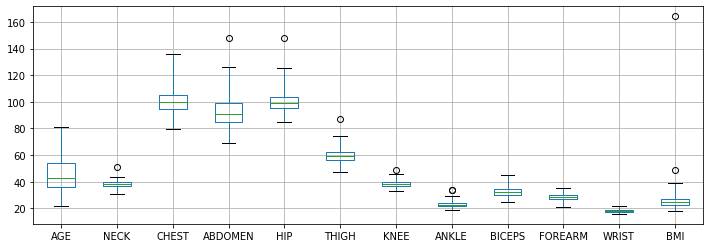

In [102]:
# 이상치 확인
df_raw_varlist=df_raw.drop(["FAT", "WEIGHT", "HEIGHT"], axis=1)
df_raw_varlist.boxplot(figsize=(12,4), whis=3)

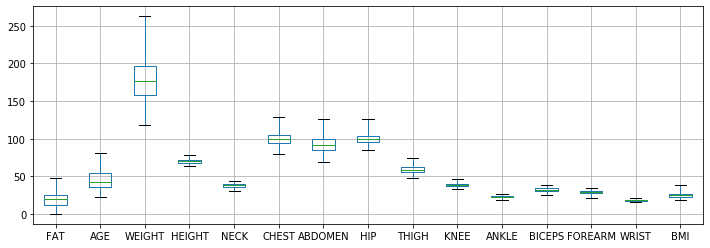

In [103]:
# 보수적으로 whis=3인 이상치만을 제거한다.
# NECK, ABDOMEN, HIP, THIGH, KNEE, ANKLE, BMI의 이상치를 제거한다.
df_p=df_raw
df_p=df_p[df_p["NECK"]<50]
df_p=df_p[df_p["ABDOMEN"]<140]
df_p=df_p[df_p["HIP"]<140]
df_p=df_p[df_p["THIGH"]<80]
df_p=df_p[df_p["BMI"]<160]
df_p=df_p[df_p["ANKLE"]<33]
df_p.boxplot(figsize=(12,4), whis=3 )

In [80]:
# BMI 계산: 뭄무게(KG)를 키(M)의 제곱으로 나눈 값
numerator=0.45*df_p['WEIGHT']
denominator=(2.54*df_p['HEIGHT']/100)**2
df_p['BMI']=numerator/denominator
df_p.describe()

,FAT,AGE,WEIGHT,HEIGHT,NECK,CHEST,ABDOMEN,HIP,THIGH,KNEE,ANKLE,BICEPS,FOREARM,WRIST,BMI
count,248.000000,248.000000,248.000000,248.000000,248.000000,248.000000,248.000000,248.000000,248.00000,248.000000,248.00000,248.000000,248.000000,248.000000,248.000000
mean,19.029839,44.846774,178.112097,70.300403,37.947581,100.669758,92.311694,99.664516,59.27500,38.535081,22.98750,32.215323,28.670161,18.219758,25.096486
std,8.301183,12.598467,27.134401,2.611962,2.297366,8.185932,10.244793,6.465921,4.92233,2.322993,1.34419,2.934178,2.035017,0.917604,3.332037
min,0.000000,22.000000,118.500000,64.000000,31.100000,79.300000,69.400000,85.000000,47.20000,33.000000,19.10000,24.800000,21.000000,15.800000,17.874982
25%,12.475000,35.750000,158.187500,68.250000,36.375000,94.150000,84.475000,95.475000,56.00000,36.900000,22.00000,30.200000,27.300000,17.600000,22.847828
50%,19.200000,43.000000,176.125000,70.000000,38.000000,99.600000,90.950000,99.300000,59.00000,38.450000,22.80000,32.000000,28.750000,18.300000,24.822534
75%,25.200000,54.000000,196.812500,72.250000,39.425000,105.300000,99.200000,103.275000,62.30000,39.900000,24.00000,34.325000,30.000000,18.800000,27.091716
max,47.500000,81.000000,262.750000,77.750000,43.900000,128.300000,126.200000,125.600000,74.40000,46.000000,27.00000,39.100000,34.900000,21.400000,38.774160


In [81]:
# 모든 변수(키와 몸무게 대신 BMI 사용)를 포함한 회귀분석
reg_model=smf.ols(formula="FAT ~BMI+AGE+NECK+CHEST+ABDOMEN+HIP+THIGH+KNEE+ANKLE+BICEPS+FOREARM+WRIST", data=df_p)
reg_result=reg_model.fit()
print(reg_result.summary())
# R^2는 0.752로, 위 모형은 전체 데이터의 약 75%를 설명한다.
# F-STAT의 P-VALUE를 고려할 때 모형은 유의하다.
# 5% 유의수준에서 BMI, 나이, 목, 복부, 엉덩이, 손목이 지방에 유의한 영향을 미친다. 

                            OLS Regression Results                            
Dep. Variable:                    FAT   R-squared:                       0.752
Model:                            OLS   Adj. R-squared:                  0.739
Method:                 Least Squares   F-statistic:                     59.23
Date:                Tue, 04 Feb 2020   Prob (F-statistic):           4.54e-64
Time:                        22:07:13   Log-Likelihood:                -703.60
No. Observations:                 248   AIC:                             1433.
Df Residuals:                     235   BIC:                             1479.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.5877      7.653      0.469      0.6

In [82]:
#설명변수 간의 다중공선성 확인(몸무게와 키는 BMI가 있으므로 제외)
df_p_x=df_p.drop(["FAT", "WEIGHT", "HEIGHT"], axis=1)
df_p_x_const=add_constant(df_p_x)

#데이터 프레임으로 저장
df_vif=pd.DataFrame()
df_vif["variable"]=df_p_x_const.columns
df_vif["VIF"]=[variance_inflation_factor(df_p_x_const.values, i) for i in range(df_p_x_const.shape[1])]
df_vif.sort_values("VIF", inplace=True)
df_vif.round(3)

#VIF가 10을 넘는 변수는 BMI와 복부이다. VIF가 가장 높은 ABDOMEN을 제거한 회귀 분석을 실시한다.

/home/pirl/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


,variable,VIF
1,AGE,2.168
10,FOREARM,2.440
8,ANKLE,3.050
9,BICEPS,3.358
11,WRIST,3.484
2,NECK,3.732
7,KNEE,4.404
6,THIGH,7.145
3,CHEST,8.875
5,HIP,9.755


In [83]:
# 복부(ABDOMEN)를 제외한 회귀분석
reg_model=smf.ols(formula="FAT ~ BMI+AGE+NECK+CHEST+HIP+THIGH+KNEE+ANKLE+BICEPS+FOREARM+WRIST", data=df_p)
reg_result=reg_model.fit()
print(reg_result.summary())
# R^2는 0.654로, 위 모형은 전체 데이터의 약 65%를 설명한다.
# F-STAT의 P-VALUE를 고려할 때 모형은 유의하다.
# 5% 유의수준에서 BMI, 나이, 손목이 지방에 유의한 영향을 미친다. 

                            OLS Regression Results                            
Dep. Variable:                    FAT   R-squared:                       0.654
Model:                            OLS   Adj. R-squared:                  0.638
Method:                 Least Squares   F-statistic:                     40.49
Date:                Tue, 04 Feb 2020   Prob (F-statistic):           3.07e-48
Time:                        22:09:55   Log-Likelihood:                -744.78
No. Observations:                 248   AIC:                             1514.
Df Residuals:                     236   BIC:                             1556.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -16.1154      8.687     -1.855      0.0

In [105]:
# 복부(ABDOMEN) 제거 후 다중공선성 재확인
df_A_x=df_p.drop(["FAT", "ABDOMEN", "WEIGHT", "HEIGHT"], axis=1)
df_A_x_const=add_constant(df_A_x)
#데이터 프레임으로 저장
df_vif=pd.DataFrame()
df_vif["variable"]=df_A_x_const.columns
df_vif["VIF"]=[variance_inflation_factor(df_A_x_const.values, i) for i in range(df_A_x_const.shape[1])]
df_vif.sort_values("VIF", inplace=True)
df_vif.round(3)
# VIF가 모두 10 이하 

,variable,VIF
1,AGE,1.848
9,FOREARM,2.420
7,ANKLE,3.037
8,BICEPS,3.320
10,WRIST,3.441
2,NECK,3.715
6,KNEE,4.375
5,THIGH,7.124
3,CHEST,7.602
4,HIP,8.493


In [89]:
# 후진제거법을 이용한 변수 선택
# 종속변수 분리
df_p_y=df_p["FAT"]
df_p_x=df_p.drop(["FAT", "WEIGHT", "HEIGHT"], axis=1)
model=LinearRegression()

# 5개의 변수가 남을 때까지 변수 선택
rfe=RFE(estimator=model, n_features_to_select=5).fit(df_p_x, df_p_y)
# 선택된 변수
selected_cols=df_p_x.columns[rfe.support_]
# 제거된 변수
removed_cols=df_p_x.columns[~rfe.support_]

print("Selected Variables: {}".format(selected_cols))
print("Removed Variables: {}".format(removed_cols))

# BMI와 ABDOMEN 모두 선택됨

Selected Variables: Index(['NECK', 'ABDOMEN', 'HIP', 'WRIST', 'BMI'], dtype='object')
Removed Variables: Index(['AGE', 'CHEST', 'THIGH', 'KNEE', 'ANKLE', 'BICEPS', 'FOREARM'], dtype='object')


In [91]:
# 후진제거법을 이용한 모델 생성
rfe_reg_model=smf.ols(formula="FAT ~ NECK+ABDOMEN+HIP+WRIST+BMI", data=df_p)
rfe_reg_result=rfe_reg_model.fit()
print(rfe_reg_result.summary())
# R^2는 0.738로 모형은 데이터의 약 74%를 설명함
# F 통계량 P-VALUE를 고려할 때 모형은 유의함
# 복부, 엉덩이, 손목이 유의함
# 복부는 지방 증가에 유의한 양의 영향을, 엉덩이와 손목은 음의 영향을 미친다. 

                            OLS Regression Results                            
Dep. Variable:                    FAT   R-squared:                       0.738
Model:                            OLS   Adj. R-squared:                  0.732
Method:                 Least Squares   F-statistic:                     136.3
Date:                Tue, 04 Feb 2020   Prob (F-statistic):           2.81e-68
Time:                        22:20:02   Log-Likelihood:                -710.23
No. Observations:                 248   AIC:                             1432.
Df Residuals:                     242   BIC:                             1454.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.1061      7.027      0.442      0.6

In [93]:
# 선택된 설명변수의 다중공선성 재진단
df_p_x_rfe=df_p_x[selected_cols]
df_p_x_rfe_const=add_constant(df_p_x_rfe)

# 다중공선성 저장
df_rfe_vif=pd.DataFrame()
df_rfe_vif["variable"]=df_p_x_rfe_const.columns
df_rfe_vif["VIF"]=[variance_inflation_factor(df_p_x_rfe_const.values, i) for i in range(df_p_x_rfe_const.shape[1])]
df_rfe_vif.sort_values("VIF", inplace=True)
df_rfe_vif.round(3)

# VIF가 10이 넘는 변수가 없음. 다중공선성 문제가 없음.

,variable,VIF
4,WRIST,2.271
1,NECK,3.205
3,HIP,4.669
2,ABDOMEN,7.021
5,BMI,7.535
0,const,664.325


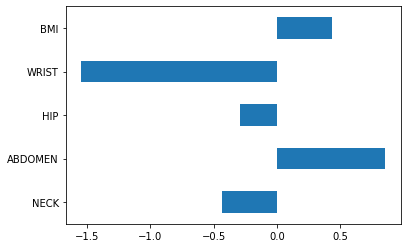

In [94]:
# 비표준화 회귀계수 산출
df_reg_coef=pd.DataFrame({"Coef": rfe_reg_result.params.values[1:]}, index=selected_cols)
df_reg_coef.plot.barh(y="Coef", legend=False)

In [110]:
# 표준화 회귀계수를 이용한 변수 중요도 확인
scaler=StandardScaler()
cols=df_p_x.columns
np_scaled=scaler.fit_transform(df_p_x)
df_scaled=pd.DataFrame(np_scaled, columns=cols)
df_scaled["FAT"]=df_p["FAT"]
reg_model_scaled=smf.ols(formula="FAT ~ NECK+ABDOMEN+HIP+WRIST+BMI", data=df_scaled)
reg_result_scaled=reg_model_scaled.fit()
print(reg_result_scaled.summary())

                            OLS Regression Results                            
Dep. Variable:                    FAT   R-squared:                       0.021
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.021
Date:                Tue, 04 Feb 2020   Prob (F-statistic):              0.406
Time:                        23:11:56   Log-Likelihood:                -861.31
No. Observations:                 244   AIC:                             1735.
Df Residuals:                     238   BIC:                             1756.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     19.0241      0.535     35.535      0.0

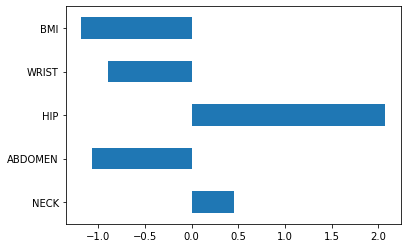

In [111]:
# 표준화 회귀계수 산출
df_reg_coef_std=pd.DataFrame({"Coef":reg_result_scaled.params.values[1:]}, index=selected_cols)
df_reg_coef_std.plot.barh(y="Coef", legend=False)

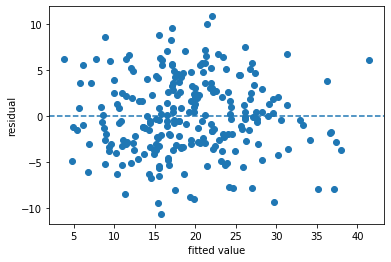

In [99]:
x

NormaltestResult(statistic=2.2462775095699214, pvalue=0.3252572878948326)

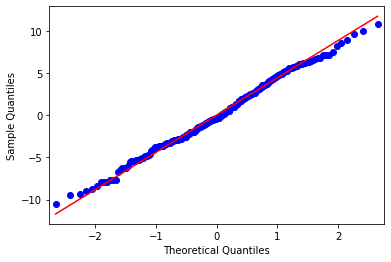

In [100]:
qqplot(reg_result.resid, line="q")
from statsmodels.stats.stattools import omni_normtest
omni_normtest(reg_result.resid, axis=0)
# 정규분포 직선(적색 선)을 중심으로 분포하고 검정통계량이 귀무가설을 채택하므로 정규분포를 따름

In [2]:
import pandas as pd
mfile_model4=pd.read_csv("mfile_model4.csv")

FileNotFoundError: [Errno 2] File b'mfile_model4.csv' does not exist: b'mfile_model4.csv'